In [2]:
!pip install pyproj

     ---------------------------------------- 4.8/4.8 MB 12.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
from pyproj import Proj, transform
import folium

In [6]:
df = pd.read_csv("Licensing_Board_Licenses.csv")
df.head()

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,business_name,dba_name,comments,...,applicant,manager,day_phone,evening_phone,address,city,state,zip,gpsx,gpsy
0,LB-494977,NaN,Active,Misc,Lodging Houses (Frat/Dorm),2022-12-02,2022-04-30,Fenway Community Development Corporation,Fenway Lodging House,NaN,...,Fenway Community Development Corporation,David Lenar,NaN,NaN,57- Hemenway ST,Boston,MA,02115,767034.398230,2.951013e+06
1,LB-476649,NaN,Active,Misc,Retail Malt Wine,2022-11-30,2023-12-31,Houjazy Inc.,Linden Suprette,No singles,...,Houjazy Inc.,Fida Houjazy,(617)780-6450,NaN,101- Brighton AVE,Boston,MA,02134,756102.970866,2.953871e+06
2,LB-494682,NaN,Active,CV,CV7MWN - Neighborhood Restricted,2022-11-29,2022-12-31,VIA CANNUCCIA LLC,Via Cannuccia,NaN,...,VIA CANNUCCIA LLC,Tsedenia Kiros,(857)370-2403,NaN,1739- Dorchester AVE,Dorchester,MA,02124,774399.002493,2.931389e+06
3,LB-493025,NaN,Active,CV,Common Victualler,2022-11-29,2022-12-31,"Render Coffee 121, LLC",Render Coffee,NaN,...,"Render Coffee 121, LLC",Christopher Dadey,(617)963-0148,NaN,32- Cambridge ST,Charlestown,MA,02129,771165.251994,2.965090e+06
4,LB-512506,NaN,Active,CV,Common Victualler,2022-11-28,2022-12-31,"Shake Shack Massachusetts, LLC",Shake Shack #1431,NaN,...,Shake Shack Massachusetts LLC,Karina Gooding,(347)573-1940,NaN,800 Boylston ST,Boston,MA,02199,769309.897281,2.951861e+06


I found business_name and applicant are the same, so I dropped 'business_name' column to avoid duplicate.

In [7]:

df = df.drop(columns=['location_comments', 'opening', 'closing', 'business_name', 'patronsout', 'comments', 'manager', 'day_phone', 'evening_phone'])
df.head()

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,dba_name,capacity,applicant,address,city,state,zip,gpsx,gpsy
0,LB-494977,NaN,Active,Misc,Lodging Houses (Frat/Dorm),2022-12-02,2022-04-30,Fenway Lodging House,14.0,Fenway Community Development Corporation,57- Hemenway ST,Boston,MA,02115,767034.398230,2.951013e+06
1,LB-476649,NaN,Active,Misc,Retail Malt Wine,2022-11-30,2023-12-31,Linden Suprette,0.0,Houjazy Inc.,101- Brighton AVE,Boston,MA,02134,756102.970866,2.953871e+06
2,LB-494682,NaN,Active,CV,CV7MWN - Neighborhood Restricted,2022-11-29,2022-12-31,Via Cannuccia,0.0,VIA CANNUCCIA LLC,1739- Dorchester AVE,Dorchester,MA,02124,774399.002493,2.931389e+06
3,LB-493025,NaN,Active,CV,Common Victualler,2022-11-29,2022-12-31,Render Coffee,8.0,"Render Coffee 121, LLC",32- Cambridge ST,Charlestown,MA,02129,771165.251994,2.965090e+06
4,LB-512506,NaN,Active,CV,Common Victualler,2022-11-28,2022-12-31,Shake Shack #1431,49.0,Shake Shack Massachusetts LLC,800 Boylston ST,Boston,MA,02199,769309.897281,2.951861e+06


In [8]:
df[df.status != 'Active']

,license_num,historicallicensenum,status,license_category,license_type,issued,expires,dba_name,capacity,applicant,address,city,state,zip,gpsx,gpsy


In [9]:

df = df.drop(['status', 'issued', 'expires'], axis=1)
df.head()

,license_num,historicallicensenum,license_category,license_type,dba_name,capacity,applicant,address,city,state,zip,gpsx,gpsy
0,LB-494977,NaN,Misc,Lodging Houses (Frat/Dorm),Fenway Lodging House,14.0,Fenway Community Development Corporation,57- Hemenway ST,Boston,MA,02115,767034.398230,2.951013e+06
1,LB-476649,NaN,Misc,Retail Malt Wine,Linden Suprette,0.0,Houjazy Inc.,101- Brighton AVE,Boston,MA,02134,756102.970866,2.953871e+06
2,LB-494682,NaN,CV,CV7MWN - Neighborhood Restricted,Via Cannuccia,0.0,VIA CANNUCCIA LLC,1739- Dorchester AVE,Dorchester,MA,02124,774399.002493,2.931389e+06
3,LB-493025,NaN,CV,Common Victualler,Render Coffee,8.0,"Render Coffee 121, LLC",32- Cambridge ST,Charlestown,MA,02129,771165.251994,2.965090e+06
4,LB-512506,NaN,CV,Common Victualler,Shake Shack #1431,49.0,Shake Shack Massachusetts LLC,800 Boylston ST,Boston,MA,02199,769309.897281,2.951861e+06


<AxesSubplot:>

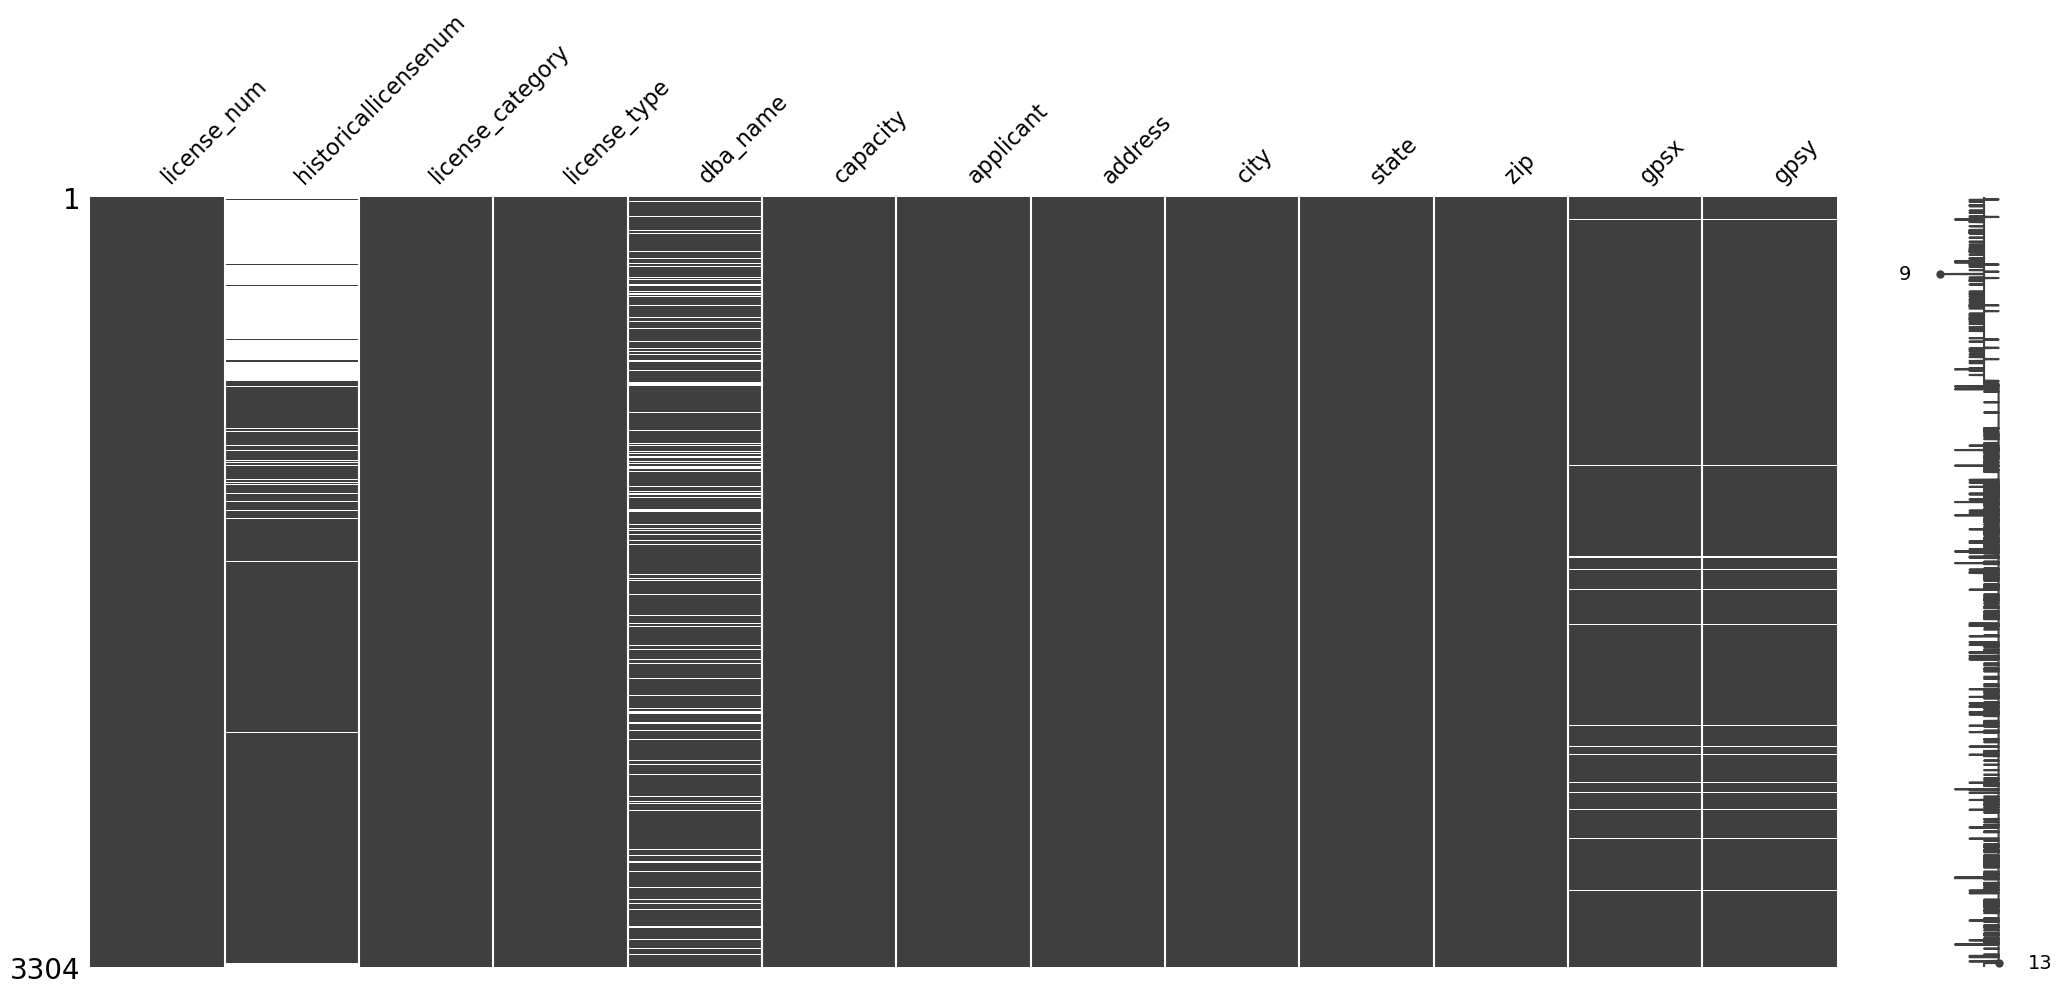

In [10]:
missingno.matrix(df)

In [11]:

df = df.drop(['historicallicensenum'], axis=1)
df.head()

,license_num,license_category,license_type,dba_name,capacity,applicant,address,city,state,zip,gpsx,gpsy
0,LB-494977,Misc,Lodging Houses (Frat/Dorm),Fenway Lodging House,14.0,Fenway Community Development Corporation,57- Hemenway ST,Boston,MA,02115,767034.398230,2.951013e+06
1,LB-476649,Misc,Retail Malt Wine,Linden Suprette,0.0,Houjazy Inc.,101- Brighton AVE,Boston,MA,02134,756102.970866,2.953871e+06
2,LB-494682,CV,CV7MWN - Neighborhood Restricted,Via Cannuccia,0.0,VIA CANNUCCIA LLC,1739- Dorchester AVE,Dorchester,MA,02124,774399.002493,2.931389e+06
3,LB-493025,CV,Common Victualler,Render Coffee,8.0,"Render Coffee 121, LLC",32- Cambridge ST,Charlestown,MA,02129,771165.251994,2.965090e+06
4,LB-512506,CV,Common Victualler,Shake Shack #1431,49.0,Shake Shack Massachusetts LLC,800 Boylston ST,Boston,MA,02199,769309.897281,2.951861e+06


In [12]:
df.groupby(['license_category']).size()

license_category
CV                    2380
Club                    55
General on Premise       4
Inn                     94
Misc                   771
dtype: int64

In [13]:
def getLoc(df):
    inProj = Proj('epsg:2249')
    outProj = Proj('epsg:4326')
    x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
    return x, y

df[['latitude', 'longitude']] = df.apply(getLoc, axis=1, result_type="expand")

C:\Users\tt2ma\AppData\Local\Temp\ipykernel_24736\1854842507.py:4: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
C:\Users\tt2ma\AppData\Local\Temp\ipykernel_24736\1854842507.py:4: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
C:\Users\tt2ma\AppData\Local\Temp\ipykernel_24736\1854842507.py:4: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
C:\Users\tt2ma\AppData\Local\Temp\ipykernel_24736\1854842507.py:4: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = 